### Distance Metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

start_date = '1999-12-29'
end_date = '2024-02-09'
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'PYPL', 'ADBE', 'INTC', 'CSCO', 'CMCSA', 'PEP', 'NFLX', 'COST', 'AMGN', 'AVGO', 'TXN', 'QCOM', 'GILD', 'SBUX'
]
price = pd.DataFrame()
for i in tickers :
    price = pd.concat([
        price, 
        yf.download(i, start=start_date, end=end_date)['Close']
    ], axis = 1)
price.columns = tickers
price.index = pd.to_datetime(price.index)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [2]:
price.dropna(inplace=True)

In [3]:
ret = price.pct_change().dropna()

In [4]:
ret_test = ret['2020-01' :]
ret = ret[: '2019-12']

### 상관계수

Text(0.5, 1.0, 'Correlation')

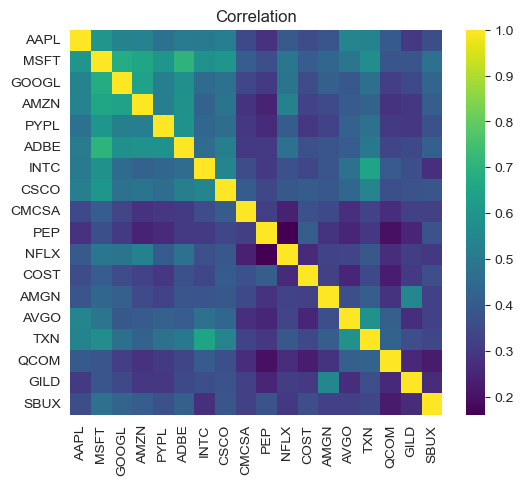

In [5]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.heatmap(
    ret.corr(), annot = False, cmap = 'viridis', ax = ax
)
plt.title('Correlation')

### 상관계수 기반 척도

$$
\begin{matrix}
d(x,y) & = & \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} \\
& = & \sqrt{\sum_{i=1}^{n} x_i^2 - 2x_iy_i + y_i^2}  = \sqrt{T + T - 2T\sigma(x,y)} \\
& = & \sqrt{2T(1 - \rho(x,y))} = \sqrt{4T}d_{\rho}(x,y)
\end{matrix}


$$

In [6]:
def _corr_dist(x, y) :
    return np.sqrt(2 * len(x) * (1 - np.corrcoef(x, y)[0,1]))

def corr_dist(ret) :
    n = len(ret.columns)
    dist = np.zeros((n,n))
    for i in range(n) :
        for j in range(n) :
            dist[i,j] = _corr_dist(ret.iloc[:,i], ret.iloc[:,j])
    dist = pd.DataFrame(dist, columns = ret.columns, index = ret.columns)
    return dist

In [7]:
dist = corr_dist(ret)
dist

,AAPL,MSFT,GOOGL,AMZN,PYPL,ADBE,INTC,CSCO,CMCSA,PEP,NFLX,COST,AMGN,AVGO,TXN,QCOM,GILD,SBUX
AAPL,0.000000,30.192061,32.334473,32.585376,34.483270,3.341578e+01,33.522302,3.301811e+01,3.843701e+01,4.033971e+01,3.705432e+01,38.293328,3.741985e+01,32.179443,32.441037,3.702685e+01,39.673032,38.204257
MSFT,30.192061,0.000000,27.013472,27.790279,30.068943,2.595318e+01,30.768119,3.001781e+01,3.667776e+01,3.797486e+01,3.394993e+01,36.657568,3.576836e+01,34.087760,31.165225,3.738060e+01,37.392019,34.636582
GOOGL,32.334473,27.013472,0.000000,28.392082,32.932613,3.081351e+01,35.256694,3.456180e+01,3.878811e+01,3.966728e+01,3.417505e+01,38.241035,3.648487e+01,37.137039,34.711803,3.938623e+01,38.449702,35.978605
AMZN,32.585376,27.790279,28.392082,0.000000,33.048510,3.079117e+01,36.192639,3.412170e+01,4.023922e+01,4.144673e+01,3.275657e+01,39.048998,3.833239e+01,36.840190,36.138694,4.037379e+01,39.930230,36.707570
PYPL,34.483270,30.068943,32.932613,33.048510,0.000000,3.062829e+01,35.803686,3.505533e+01,3.993155e+01,4.091204e+01,3.679483e+01,39.970432,3.906844e+01,36.261002,34.644828,3.970066e+01,39.989421,37.776039
ADBE,33.415781,25.953185,30.813513,30.791169,30.628294,7.087065e-07,35.160763,3.294054e+01,3.979708e+01,3.979600e+01,3.458220e+01,37.844626,3.739473e+01,36.732613,33.625457,3.888102e+01,38.502907,36.489375
INTC,33.522302,30.768119,35.256694,36.192639,35.803686,3.516076e+01,0.000000,3.219872e+01,3.828159e+01,3.971331e+01,3.786577e+01,38.614443,3.748073e+01,34.594080,28.050041,3.692600e+01,37.963405,40.554592
CSCO,33.018113,30.017814,34.561805,34.121696,35.055330,3.294054e+01,32.198724,5.011312e-07,3.680841e+01,3.862448e+01,3.720638e+01,36.743940,3.719924e+01,35.709965,32.246627,3.800167e+01,37.630533,37.411444
CMCSA,38.437010,36.677757,38.788110,40.239224,39.931548,3.979708e+01,38.281587,3.680841e+01,5.011312e-07,3.927242e+01,4.150502e+01,37.895490,3.845778e+01,40.479512,39.066389,4.073178e+01,39.087995,39.106684
PEP,40.339705,37.974861,39.667281,41.446729,40.912044,3.979600e+01,39.713315,3.862448e+01,3.927242e+01,7.087065e-07,4.356517e+01,36.545781,4.021725e+01,41.131522,39.956132,4.267795e+01,41.288112,37.674211


Text(0.5, 1.0, 'Correlation based Distance')

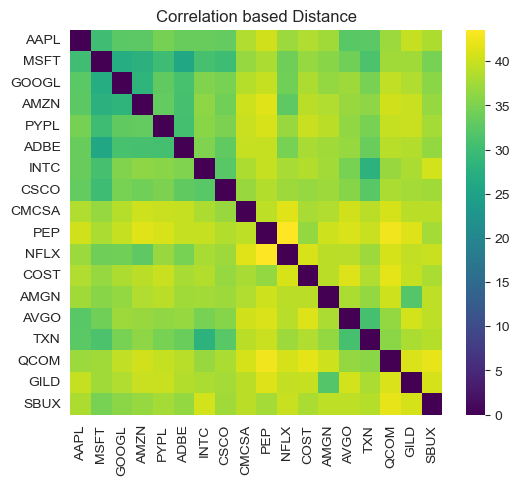

In [8]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.heatmap(
    dist, annot = False, cmap = 'viridis', ax = ax
)
plt.title('Correlation based Distance')

#### Jensen-Shannon Divergence

$$
D_{KL}(P||Q) = \sum_{i} P(i) \log \frac{P(i)}{Q(i)}
$$

In [9]:
from scipy.special import rel_entr
from scipy.stats import gaussian_kde

def _js_divergence(x, y) :
    kde1, kde2 = gaussian_kde(x), gaussian_kde(y)
    estimate = np.linspace(
        min(np.min(x), np.min(y)), 
        max(np.max(x), np.max(y)), 
        len(x)
    )
    pdf1, pdf2 = kde1(estimate), kde2(estimate)
    m = 0.5 * (pdf1 + pdf2)
    return 0.5 * np.sum(rel_entr(pdf1, m)) + 0.5 * np.sum(rel_entr(pdf2, m))

def js_divergence(ret) :
    n = len(ret.columns)
    dist = np.zeros((n,n))
    for i in range(n) :
        for j in range(n) :
            dist[i,j] = _js_divergence(ret.iloc[:,i], ret.iloc[:,j])
    dist = pd.DataFrame(dist, columns = ret.columns, index = ret.columns)
    return dist

In [10]:
jsd = js_divergence(ret)
jsd

,AAPL,MSFT,GOOGL,AMZN,PYPL,ADBE,INTC,CSCO,CMCSA,PEP,NFLX,COST,AMGN,AVGO,TXN,QCOM,GILD,SBUX
AAPL,0.000000,21.993100,12.843268,21.369426,36.763039,15.244288,19.186561,28.697030,31.584452,225.646714,120.751174,92.108983,19.627769,65.178354,18.642429,14.759715,30.071155,59.265063
MSFT,21.993100,0.000000,9.171094,37.103915,70.897748,24.401116,26.949320,11.195746,24.076755,151.294540,170.525747,48.367757,18.719427,106.002017,20.671269,32.192511,40.027757,34.431205
GOOGL,12.843268,9.171094,0.000000,28.491200,45.052551,16.581223,19.600779,9.356349,16.078888,120.129134,159.814761,39.584071,18.636021,75.173572,14.313635,27.719791,25.547784,24.737539
AMZN,21.369426,37.103915,28.491200,0.000000,15.698378,9.081618,24.197921,37.638136,46.171597,247.566669,87.690865,108.573644,39.202005,35.326239,24.290113,13.407179,31.333868,81.524929
PYPL,36.763039,70.897748,45.052551,15.698378,0.000000,21.800653,26.830980,75.798540,79.404849,368.006306,61.414565,185.958348,57.791499,13.361038,33.497057,13.922928,36.930261,135.899906
ADBE,15.244288,24.401116,16.581223,9.081618,21.800653,0.000000,17.075180,27.512262,34.704802,218.351880,106.342092,88.190963,32.853062,47.396140,13.065138,12.432536,27.717118,65.816102
INTC,19.186561,26.949320,19.600779,24.197921,26.830980,17.075180,0.000000,32.860736,28.709219,220.497862,110.331965,98.247292,23.713891,50.314444,17.376041,13.196944,12.023003,60.925692
CSCO,28.697030,11.195746,9.356349,37.638136,75.798540,27.512262,32.860736,0.000000,14.234335,131.651151,172.807490,38.534527,20.007754,114.630149,21.856062,31.501400,36.553130,26.439748
CMCSA,31.584452,24.076755,16.078888,46.171597,79.404849,34.704802,28.709219,14.234335,0.000000,196.449611,171.981625,56.161293,22.583360,112.329436,27.172442,28.282051,31.368875,26.977057
PEP,225.646714,151.294540,120.129134,247.566669,368.006306,218.351880,220.497862,131.651151,196.449611,0.000000,406.098838,66.254692,195.445040,380.658656,200.687212,148.562323,272.577347,77.141111


Text(0.5, 1.0, 'Jensen-Shannon Divergence')

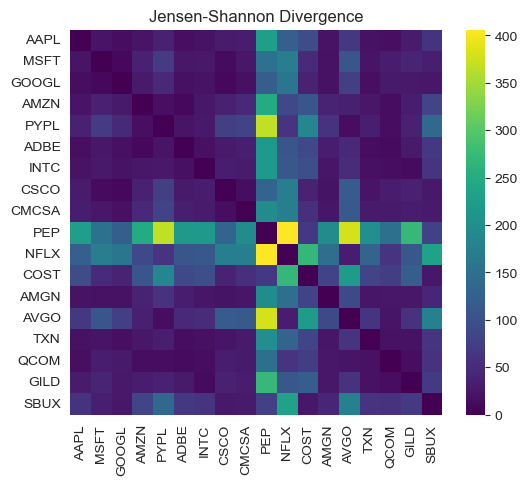

In [11]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.heatmap(
    jsd, annot = False, cmap = 'viridis', ax = ax
)
plt.title('Jensen-Shannon Divergence')

#### Variational Information

In [12]:
import scipy.stats as ss
from sklearn.metrics import mutual_info_score

def num_bins(nObs, corr = None) :
    if corr is None :
        z = (8 + 324 * nObs + 12 * (36 * nObs + 729 * nObs ** 2) ** 0.5) ** (1/3)
        b = round(z / 6 + 2 / (3 * z) + 1 / 3)
    else :
        b = round(2 ** 0.5 * (1 + (1 + 24 * nObs * (1 - corr ** 2)) ** 0.5) ** 0.5)
    return int(b)

def _var_info(x, y, norm = False) :
    b_xy = num_bins(len(x), np.corrcoef(x, y)[0,1])
    c_xy = np.histogram2d(x, y, bins = b_xy)[0]
    i_xy = mutual_info_score(None, None, contingency = c_xy)
    hx = ss.entropy(np.histogram(x, bins = b_xy)[0])
    hy = ss.entropy(np.histogram(y, bins = b_xy)[0])
    v_xy = hx + hy - (2 * i_xy)
    if norm :
        h_xy = hx + hy - i_xy
        v_xy /= h_xy
    return v_xy

In [13]:
def var_info(ret, norm = False) :
    n = len(ret.columns)
    dist = np.zeros((n,n))
    for i in range(n) :
        for j in range(n) :
            dist[i,j] = _var_info(ret.iloc[:,i], ret.iloc[:,j], norm)
    dist = pd.DataFrame(dist, columns = ret.columns, index = ret.columns)
    return dist

In [14]:
vi = var_info(ret)
vi

,AAPL,MSFT,GOOGL,AMZN,PYPL,ADBE,INTC,CSCO,CMCSA,PEP,NFLX,COST,AMGN,AVGO,TXN,QCOM,GILD,SBUX
AAPL,-4.440892e-16,2.833730e+00,2.736691e+00,2.987306e+00,3.267592e+00,3.028690e+00,3.042482e+00,2.969341e+00,3.552008e+00,3.554462e+00,3.121814e+00,3.336788e+00,3.402336e+00,3.045655e+00,2.906126e+00,2.674526e+00,3.486581e+00,3.092248e+00
MSFT,2.833730e+00,-1.110223e-15,2.276451e+00,2.573659e+00,2.813767e+00,2.366276e+00,2.754891e+00,2.589724e+00,3.216606e+00,3.348691e+00,2.920695e+00,3.062240e+00,3.115847e+00,3.018622e+00,2.793889e+00,2.675762e+00,3.281041e+00,2.824007e+00
GOOGL,2.736691e+00,2.276451e+00,-1.221245e-15,2.293635e+00,2.841607e+00,2.396329e+00,2.699851e+00,2.629444e+00,3.121901e+00,3.164822e+00,2.657227e+00,2.992305e+00,2.871498e+00,2.845844e+00,2.619546e+00,2.478144e+00,3.070019e+00,2.627469e+00
AMZN,2.987306e+00,2.573659e+00,2.293635e+00,-2.220446e-16,3.088674e+00,2.672478e+00,2.987445e+00,2.896392e+00,3.388049e+00,3.429493e+00,2.858385e+00,3.192857e+00,3.223799e+00,3.080081e+00,2.920769e+00,2.730637e+00,3.323149e+00,2.870980e+00
PYPL,3.267592e+00,2.813767e+00,2.841607e+00,3.088674e+00,-8.881784e-16,2.807360e+00,3.166066e+00,3.087681e+00,3.582249e+00,3.620071e+00,3.187065e+00,3.446341e+00,3.488850e+00,3.289211e+00,3.067984e+00,2.923672e+00,3.553969e+00,3.173679e+00
ADBE,3.028690e+00,2.366276e+00,2.396329e+00,2.672478e+00,2.807360e+00,-1.221245e-15,2.969515e+00,2.835109e+00,3.353260e+00,3.392600e+00,2.885942e+00,3.173891e+00,3.207886e+00,3.045892e+00,2.863741e+00,2.698455e+00,3.317639e+00,2.829164e+00
INTC,3.042482e+00,2.754891e+00,2.699851e+00,2.987445e+00,3.166066e+00,2.969515e+00,-6.661338e-16,2.827249e+00,3.407175e+00,3.405257e+00,3.138687e+00,3.232509e+00,3.305403e+00,3.028263e+00,2.515545e+00,2.521078e+00,3.326560e+00,3.015847e+00
CSCO,2.969341e+00,2.589724e+00,2.629444e+00,2.896392e+00,3.087681e+00,2.835109e+00,2.827249e+00,-8.881784e-16,3.213435e+00,3.338364e+00,2.948889e+00,3.006915e+00,3.110745e+00,2.976685e+00,2.758838e+00,2.633530e+00,3.268978e+00,2.901906e+00
CMCSA,3.552008e+00,3.216606e+00,3.121901e+00,3.388049e+00,3.582249e+00,3.353260e+00,3.407175e+00,3.213435e+00,-8.881784e-16,3.622041e+00,3.449409e+00,3.443304e+00,3.556375e+00,3.542436e+00,3.357679e+00,3.028615e+00,3.586329e+00,3.221743e+00
PEP,3.554462e+00,3.348691e+00,3.164822e+00,3.429493e+00,3.620071e+00,3.392600e+00,3.405257e+00,3.338364e+00,3.622041e+00,-8.881784e-16,3.483831e+00,3.284932e+00,3.567672e+00,3.554763e+00,3.356597e+00,3.033272e+00,3.624365e+00,3.216224e+00


Text(0.5, 1.0, 'Variational Information')

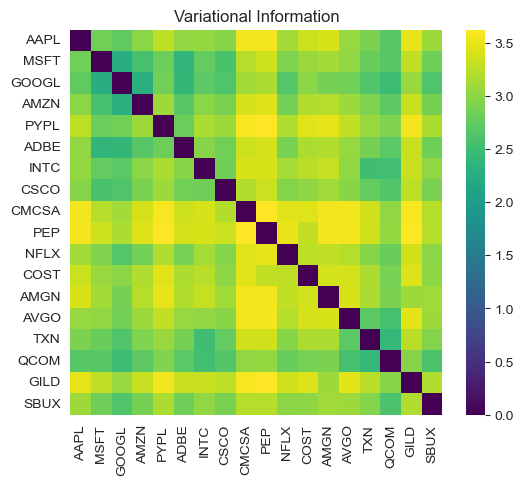

In [15]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.heatmap(
    vi, annot = False, cmap = 'viridis', ax = ax
)
plt.title('Variational Information')

#### Mutual Information

In [16]:
def _mutual_info(x, y, norm = False) :
    b_xy = num_bins(len(x), np.corrcoef(x, y)[0,1])
    c_xy = np.histogram2d(x, y, bins = b_xy)[0]
    i_xy = mutual_info_score(None, None, contingency = c_xy)
    if norm :
        hx = ss.entropy(np.histogram(x, bins = b_xy)[0])
        hy = ss.entropy(np.histogram(y, bins = b_xy)[0])
        i_xy /= (hx + hy)
    return i_xy

def mutual_info(ret, norm = False) :
    n = len(ret.columns)
    dist = np.zeros((n,n))
    for i in range(n) :
        for j in range(n) :
            dist[i,j] = _mutual_info(ret.iloc[:,i], ret.iloc[:,j], norm)
    dist = pd.DataFrame(dist, columns = ret.columns, index = ret.columns)
    return dist

In [17]:
mi = mutual_info(ret)
mi

,AAPL,MSFT,GOOGL,AMZN,PYPL,ADBE,INTC,CSCO,CMCSA,PEP,NFLX,COST,AMGN,AVGO,TXN,QCOM,GILD,SBUX
AAPL,0.374398,0.276631,0.240932,0.251359,0.209955,0.214716,0.221265,0.231295,0.147023,0.130330,0.160825,0.151356,0.171986,0.251069,0.258944,0.148102,0.149969,0.156091
MSFT,0.276631,0.363884,0.358067,0.348251,0.321503,0.377865,0.255486,0.311861,0.200391,0.165684,0.212057,0.181131,0.201971,0.215258,0.265735,0.154394,0.185208,0.181196
GOOGL,0.240932,0.358067,0.037642,0.351649,0.236001,0.285306,0.205633,0.214297,0.168091,0.131165,0.206172,0.129612,0.186526,0.164028,0.215287,0.126749,0.164265,0.141846
AMZN,0.251359,0.348251,0.351649,0.199685,0.248203,0.286019,0.197572,0.216558,0.163061,0.126873,0.241328,0.157379,0.195313,0.182645,0.200411,0.128547,0.165744,0.155826
PYPL,0.209955,0.321503,0.236001,0.248203,0.575758,0.311884,0.207001,0.219653,0.172609,0.138232,0.175728,0.137286,0.169436,0.176819,0.225543,0.138678,0.156982,0.156082
ADBE,0.214716,0.377865,0.285306,0.286019,0.311884,0.320984,0.190586,0.231249,0.173985,0.138849,0.211599,0.160392,0.196799,0.183788,0.212974,0.138167,0.162028,0.160783
INTC,0.221265,0.255486,0.205633,0.197572,0.207001,0.190586,0.602949,0.248623,0.153130,0.138623,0.150460,0.137185,0.154142,0.206048,0.343961,0.171108,0.163670,0.127981
CSCO,0.231295,0.311861,0.214297,0.216558,0.219653,0.231249,0.248623,0.641888,0.171046,0.145566,0.167030,0.177863,0.173592,0.205297,0.252331,0.150228,0.165958,0.158449
CMCSA,0.147023,0.200391,0.168091,0.163061,0.172609,0.173985,0.153130,0.171046,0.554681,0.155417,0.120285,0.156974,0.153842,0.126662,0.148274,0.104375,0.158971,0.150219
PEP,0.130330,0.165684,0.131165,0.126873,0.138232,0.138849,0.138623,0.145566,0.155417,0.692049,0.087608,0.173058,0.132728,0.105033,0.133349,0.086581,0.124487,0.137513


Text(0.5, 1.0, 'Mutual Information')

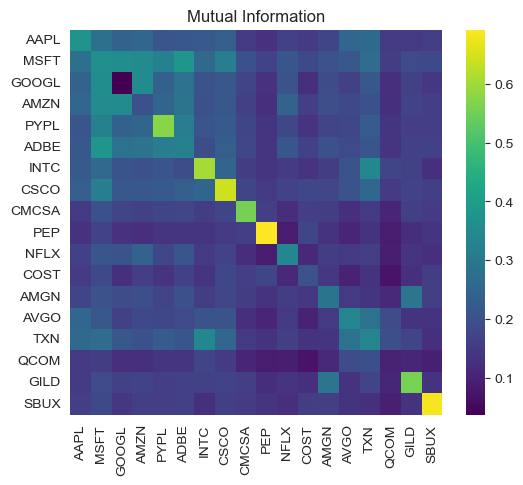

In [18]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.heatmap(
    mi, annot = False, cmap = 'viridis', ax = ax
)
plt.title('Mutual Information')

In [19]:
from scipy.optimize import minimize

def markowitz_optimization(returns, distance_matrix, target_return):
    n = distance_matrix.shape[0]
    initial_weights = np.ones(n) / n

    def portfolio_risk(weights):
        weighted_distance = np.dot(weights.T, np.dot(distance_matrix, weights))
        return np.sqrt(weighted_distance)

    def target_return_constraint(weights):
        return target_return - np.dot(weights, returns)

    def weight_sum_constraint(weights):
        return np.sum(weights) - 1

    constraints = [{'type': 'eq', 'fun': weight_sum_constraint},
                   {'type': 'eq', 'fun': target_return_constraint}]

    bounds = tuple((0, 1) for _ in range(n))

    result = minimize(portfolio_risk, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    result = pd.Series(result.x, index = returns.index)

    return result

In [20]:
def generate_random_portfolios(returns, distance_matrix, num_portfolios=5000):
    n = returns.shape[1]  
    mean_returns = returns.mean()  
    portfolio_returns = []
    portfolio_volatility = []
    for _ in range(num_portfolios):
        weights = np.random.random(n)
        weights /= np.sum(weights)
        
        portfolio_return = np.dot(weights, mean_returns)
        portfolio_returns.append(portfolio_return)
        
        portfolio_var = np.dot(weights.T, np.dot(distance_matrix, weights))
        portfolio_std = np.sqrt(portfolio_var)
        portfolio_volatility.append(portfolio_std)

    portfolios = pd.DataFrame({
        'Return': portfolio_returns,
        'Volatility': portfolio_volatility
    })
    
    return portfolios

def find_optimal_portfolio(returns, distance_matrix, risk_free_rate=0.0):
    n = returns.shape[1]
    mean_returns = returns.mean()

    def neg_sharpe_ratio(weights):
        portfolio_return = np.dot(weights, mean_returns)
        portfolio_var = np.dot(weights.T, np.dot(distance_matrix, weights))
        portfolio_std = np.sqrt(portfolio_var)
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std
        return -sharpe_ratio 

    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},)
    bounds = tuple((0, 1) for _ in range(n))
    initial_weights = np.ones(n) / n

    result = minimize(neg_sharpe_ratio, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    
    optimal_weights = result.x
    optimal_weights = pd.Series(optimal_weights, index = returns.columns, name = 'weight')
    optimal_return = np.dot(optimal_weights, mean_returns)
    return optimal_weights, optimal_return

In [21]:
portfolio_mi = generate_random_portfolios(ret, mi, num_portfolios = 5000)
optimal_weight_mi, optimal_return_mi = find_optimal_portfolio(ret, mi)

In [22]:
optimal_return_mi

0.0013266359330994437

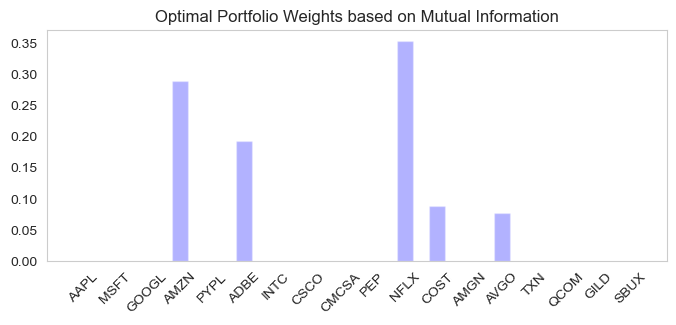

In [23]:
plt.figure(figsize = (8, 3))
plt.bar(
    optimal_weight_mi.index, optimal_weight_mi, color = 'b', alpha = 0.3, label = 'Optimal Portfolio', width = 0.5
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights based on Mutual Information')
plt.show()

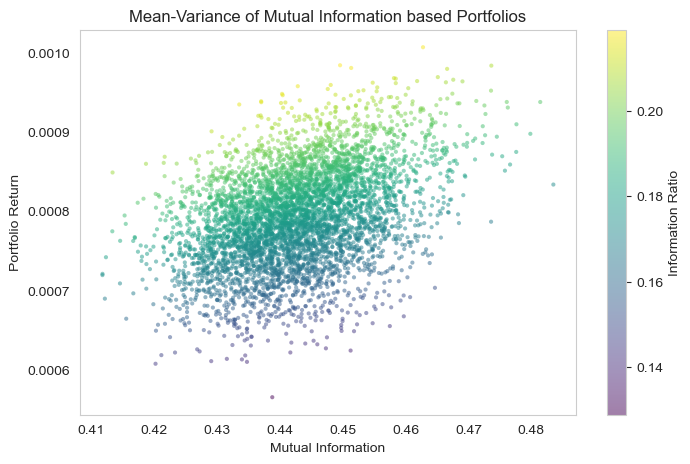

In [24]:
plt.figure(figsize = (8, 5))
plt.scatter(
    portfolio_mi['Volatility'], 
    portfolio_mi['Return'], 
    c = (portfolio_mi['Return'] / portfolio_mi['Volatility']) * 100, 
    marker = '.',
    cmap = 'viridis',
    alpha = 0.5,
    edgecolors = 'none'
)
plt.grid(False)
plt.colorbar(label = 'Information Ratio')
plt.xlabel('Mutual Information')
plt.ylabel('Portfolio Return')
plt.title('Mean-Variance of Mutual Information based Portfolios')
plt.show()

In [25]:
portfolio_vi = generate_random_portfolios(ret, vi, num_portfolios = 5000)
optimal_weight_vi, optimal_return_vi = find_optimal_portfolio(ret, vi)

In [26]:
optimal_return_vi

0.001347576191381264

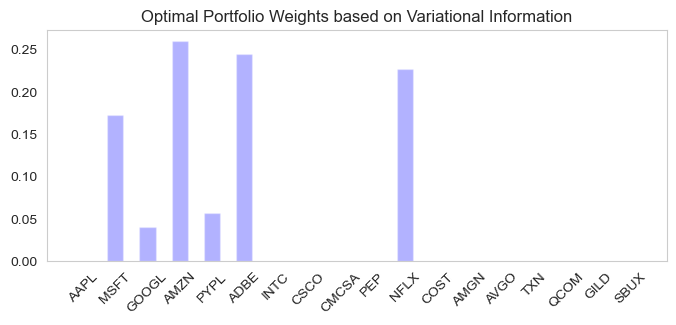

In [27]:
plt.figure(figsize = (8, 3))
plt.bar(
    optimal_weight_vi.index, optimal_weight_vi, color = 'b', alpha = 0.3, label = 'Optimal Portfolio', width = 0.5
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights based on Variational Information')
plt.show()

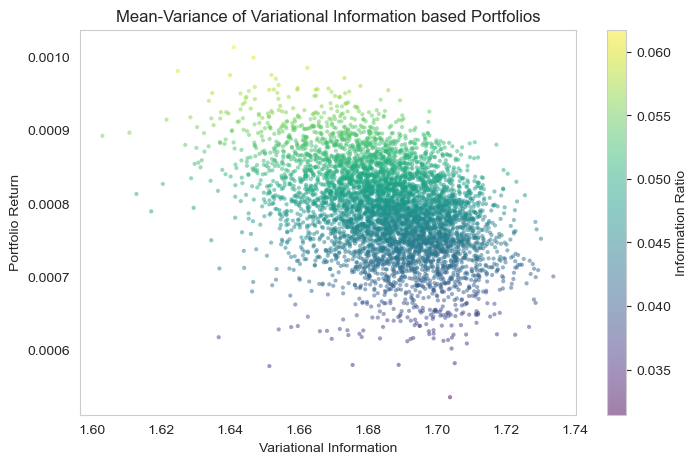

In [28]:
plt.figure(figsize = (8, 5))
plt.scatter(
    portfolio_vi['Volatility'], 
    portfolio_vi['Return'], 
    c = (portfolio_vi['Return'] / portfolio_vi['Volatility']) * 100, 
    marker = '.',
    cmap = 'viridis',
    alpha = 0.5,
    edgecolors = 'none'
)
plt.grid(False)
plt.colorbar(label = 'Information Ratio')
plt.xlabel('Variational Information')
plt.ylabel('Portfolio Return')
plt.title('Mean-Variance of Variational Information based Portfolios')
plt.show()

In [29]:
portfolio_jsd = generate_random_portfolios(ret, jsd, num_portfolios = 5000)
optimal_weight_jsd, optimal_return_jsd = find_optimal_portfolio(ret, jsd)

In [30]:
optimal_return_jsd

0.0007936999549336029

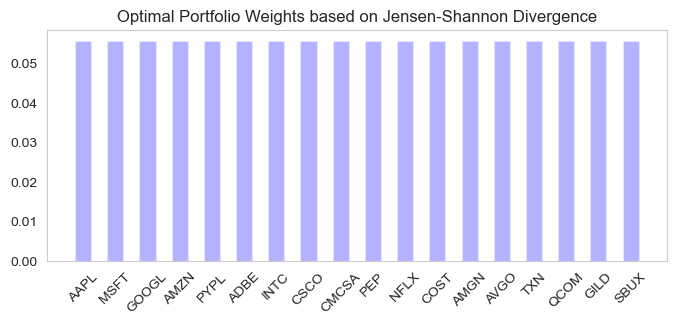

In [31]:
plt.figure(figsize = (8, 3))
plt.bar(
    optimal_weight_jsd.index, optimal_weight_jsd, color = 'b', alpha = 0.3, label = 'Optimal Portfolio', width = 0.5
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights based on Jensen-Shannon Divergence')
plt.show()

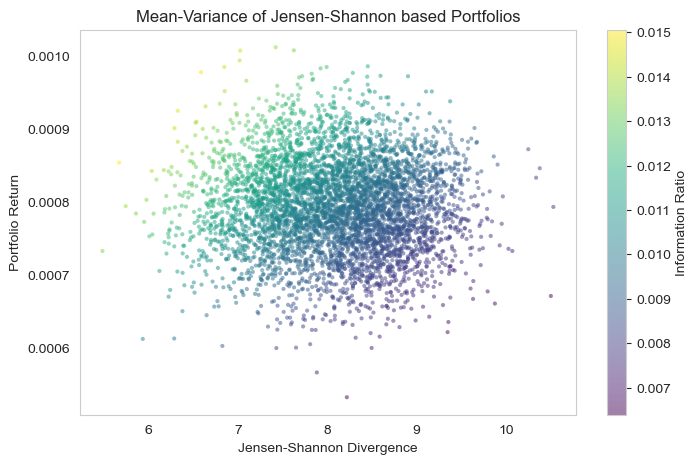

In [32]:
plt.figure(figsize = (8, 5))
plt.scatter(
    portfolio_jsd['Volatility'], 
    portfolio_jsd['Return'], 
    c = (portfolio_jsd['Return'] / portfolio_jsd['Volatility']) * 100, 
    marker = '.',
    cmap = 'viridis',
    alpha = 0.5,
    edgecolors = 'none'
)
plt.grid(False)
plt.colorbar(label = 'Information Ratio')
plt.xlabel('Jensen-Shannon Divergence')
plt.ylabel('Portfolio Return')
plt.title('Mean-Variance of Jensen-Shannon based Portfolios')
plt.show()

In [33]:
portfolio_corr_dist = generate_random_portfolios(ret, dist, num_portfolios = 5000)

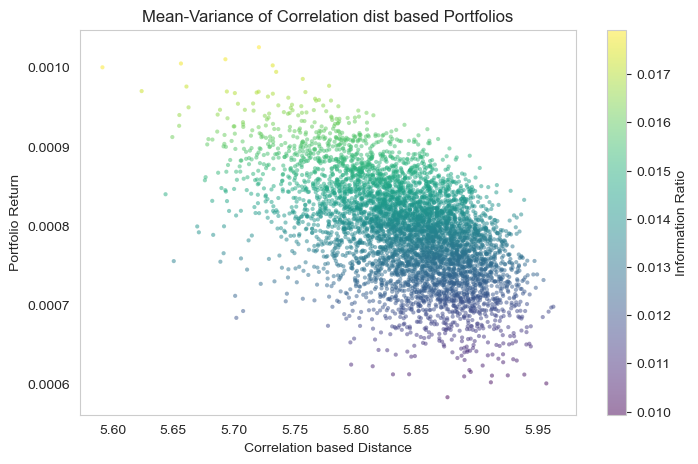

In [34]:
plt.figure(figsize = (8, 5))
plt.scatter(
    portfolio_corr_dist['Volatility'], 
    portfolio_corr_dist['Return'], 
    c = (portfolio_corr_dist['Return'] / portfolio_corr_dist['Volatility']) * 100, 
    marker = '.',
    cmap = 'viridis',
    alpha = 0.5,
    edgecolors = 'none'
)
plt.grid(False)
plt.colorbar(label = 'Information Ratio')
plt.xlabel('Correlation based Distance')
plt.ylabel('Portfolio Return')
plt.title('Mean-Variance of Correlation dist based Portfolios')
plt.show()

In [35]:
portfolio_corr = generate_random_portfolios(ret, ret.corr(), num_portfolios = 5000)
optimal_weight_corr_dist, optimal_return_corr_dist = find_optimal_portfolio(ret, ret.corr())

In [36]:
optimal_return_corr_dist

0.001275065808250399

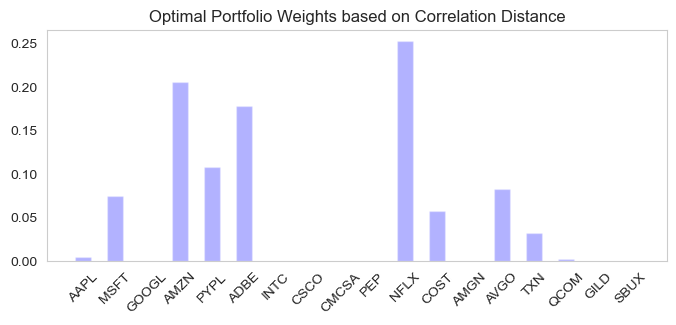

In [37]:
plt.figure(figsize = (8, 3))
plt.bar(
    optimal_weight_corr_dist.index, optimal_weight_corr_dist, color = 'b', alpha = 0.3, label = 'Optimal Portfolio', width = 0.5
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights based on Correlation Distance')
plt.show()

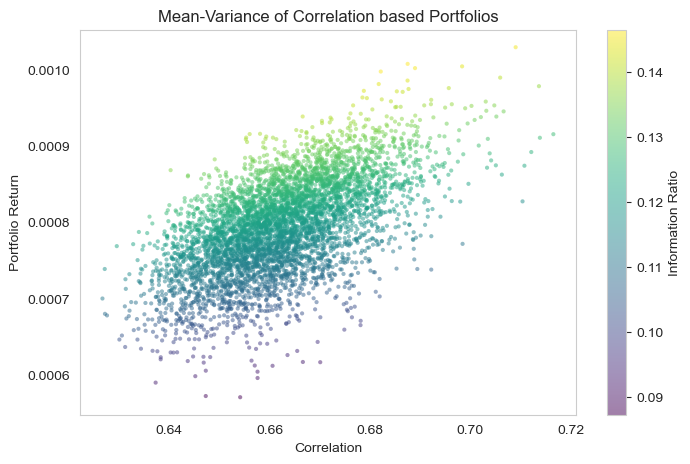

In [38]:
plt.figure(figsize = (8, 5))
plt.scatter(
    portfolio_corr['Volatility'], 
    portfolio_corr['Return'], 
    c = (portfolio_corr['Return'] / portfolio_corr['Volatility']) * 100, 
    marker = '.',
    cmap = 'viridis',
    alpha = 0.5,
    edgecolors = 'none'
)
plt.grid(False)
plt.colorbar(label = 'Information Ratio')
plt.xlabel('Correlation')
plt.ylabel('Portfolio Return')
plt.title('Mean-Variance of Correlation based Portfolios')
plt.show()

In [39]:
return_comparison = [optimal_return_corr_dist, optimal_return_jsd, optimal_return_vi, optimal_return_mi]
weight_comparison = pd.DataFrame(
    [optimal_weight_corr_dist, optimal_weight_jsd, optimal_weight_vi, optimal_weight_mi], 
    index = ['Correlation Distance', 'Jensen-Shannon Divergence', 'Variational Information', 'Mutual Information']
)

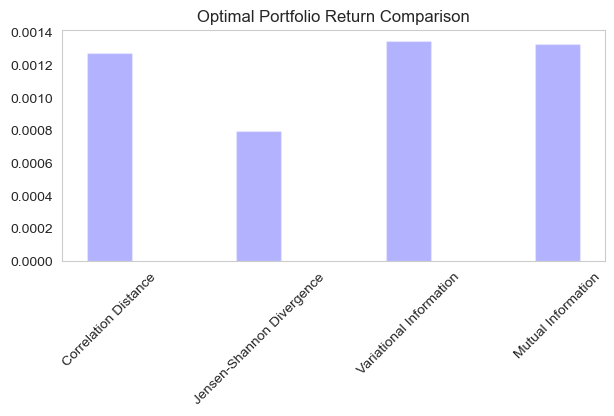

In [40]:
plt.figure(figsize = (7, 3))
plt.bar(
    ['Correlation Distance', 'Jensen-Shannon Divergence', 'Variational Information', 'Mutual Information'], 
    return_comparison, 
    color = 'b', 
    alpha = 0.3, 
    label = 'Optimal Portfolio', 
    width = 0.3
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Return Comparison')
plt.show()

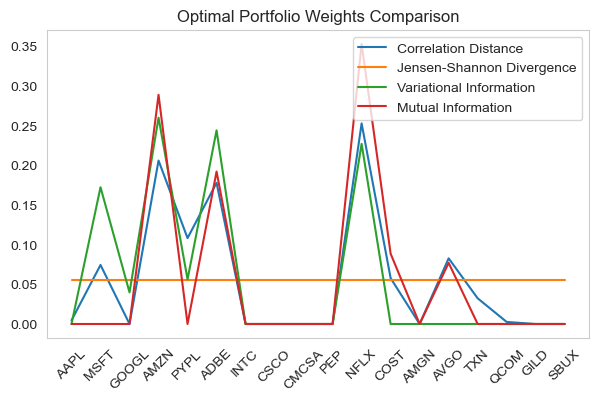

In [41]:
plt.figure(figsize = (7, 4))
plt.plot(
    weight_comparison.T
)
plt.legend([
    'Correlation Distance', 'Jensen-Shannon Divergence', 'Variational Information', 'Mutual Information'
])
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights Comparison')
plt.show()

#### Backtesting

In [42]:
import quantstats as qs

In [43]:
backtest = pd.DataFrame()
backtest = pd.concat(
    [
        backtest, 
        (ret_test * optimal_weight_corr_dist).sum(axis = 1),
        (ret_test * optimal_weight_jsd).sum(axis = 1),
        (ret_test * optimal_weight_vi).sum(axis = 1),
        (ret_test * optimal_weight_mi).sum(axis = 1)
    ], axis = 1
)
backtest.columns = [
    'Correlation Distance', 'Jensen-Shannon Divergence', 'Variational Information', 'Mutual Information'
]

In [44]:
backtest.index = pd.to_datetime(backtest.index)

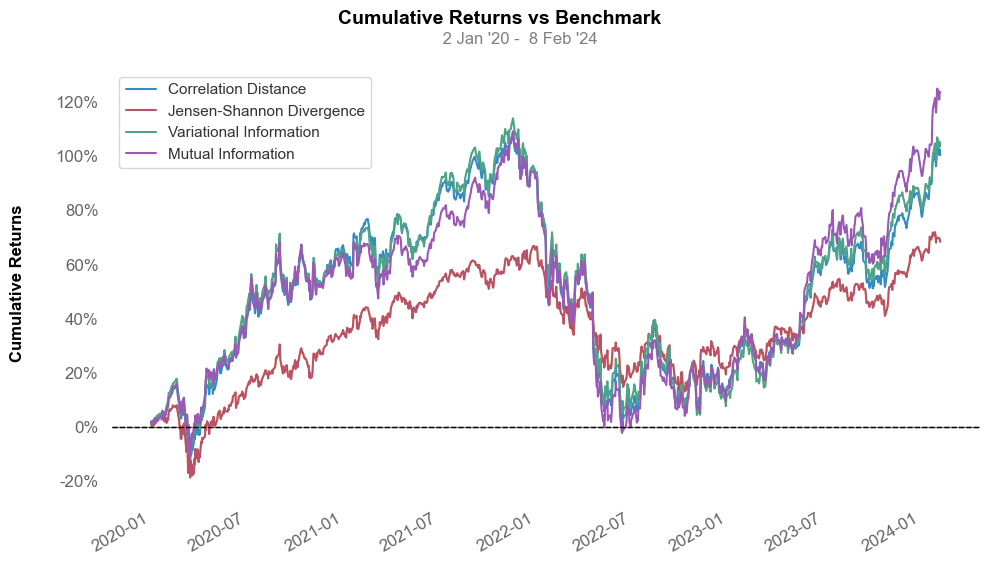

In [45]:
plt.rcParams["axes.grid"] = False  # 모든 플롯에 대해 그리드 비활성화
qs.plots.returns(
    backtest,
    benchmark = ret_test.mean(axis = 1),
)

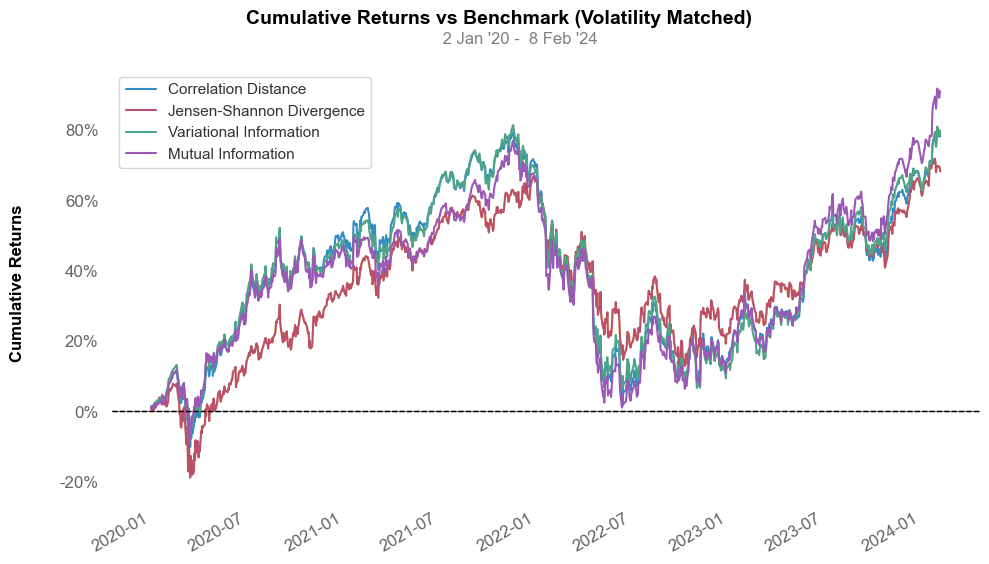

In [46]:
qs.plots.returns(
    backtest[['Correlation Distance', 'Jensen-Shannon Divergence', 'Variational Information', 'Mutual Information']],
    benchmark = ret_test.mean(axis = 1),
    match_volatility = True
)

In [47]:
qs.reports.metrics(backtest, benchmark = ret_test.mean(axis = 1))

                    Benchmark    Correlation Distance    Jensen-Shannon Divergence    Variational Information    Mutual Information
------------------  -----------  ----------------------  ---------------------------  -------------------------  --------------------
Start Period        2020-01-02   2020-01-02              2020-01-02                   2020-01-02                 2020-01-02
End Period          2024-02-08   2024-02-08              2024-02-08                   2024-02-08                 2024-02-08
Risk-Free Rate      0.0%         0.0%                    0.0%                         0.0%                       0.0%
Time in Market      100.0%       100.0%                  100.0%                       100.0%                     100.0%

Cumulative Return   68.34%       100.42%                 68.34%                       103.85%                    123.67%
CAGR﹪              9.16%        12.41%                  9.16%                        12.73%                     14.5%

Sharpe 

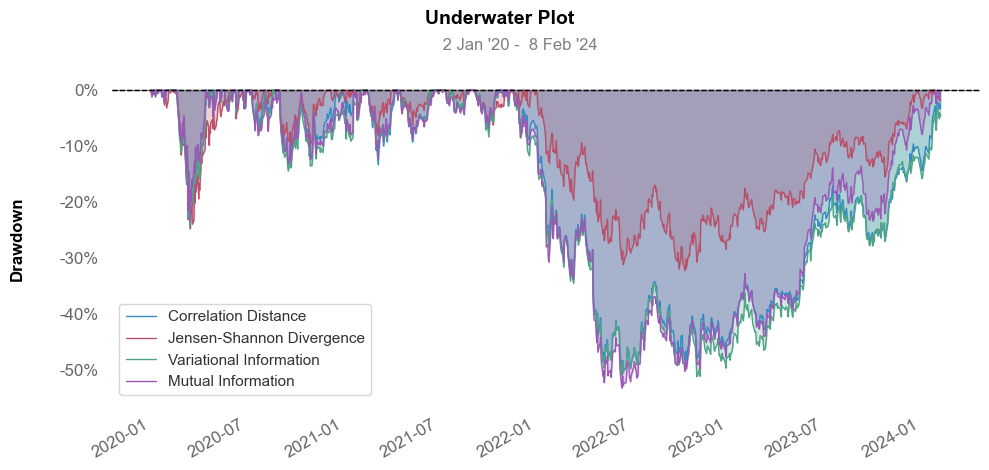

In [48]:
qs.plots.drawdown(backtest)

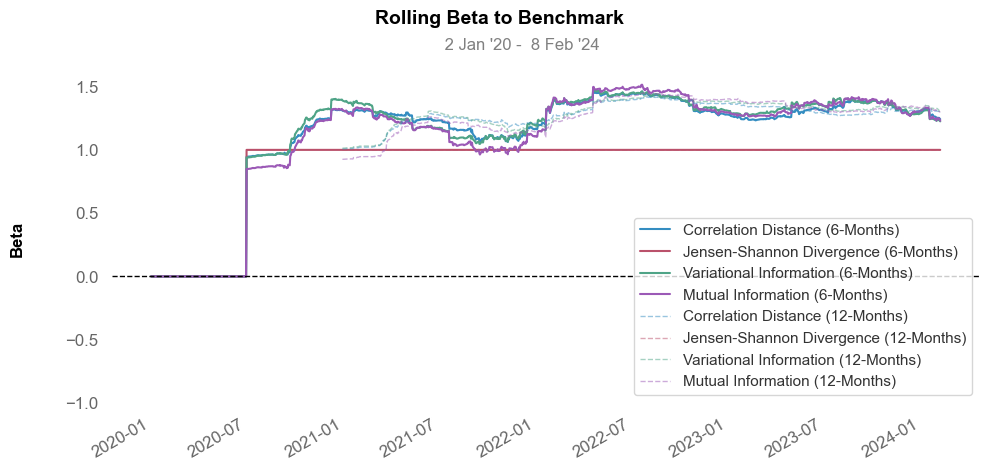

In [50]:
qs.plots.rolling_beta(backtest, ret_test.mean(axis = 1), figsize = (10, 5))

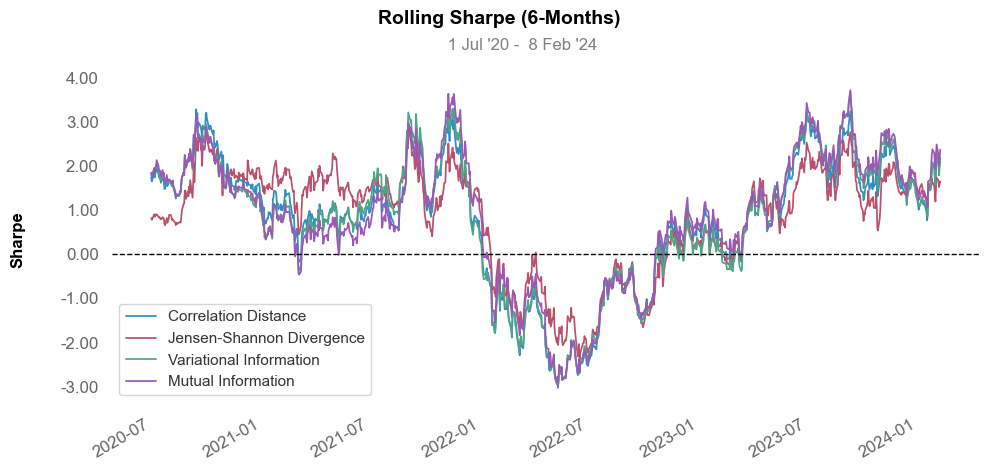

In [51]:
qs.plots.rolling_sharpe(backtest, figsize = (10, 5))

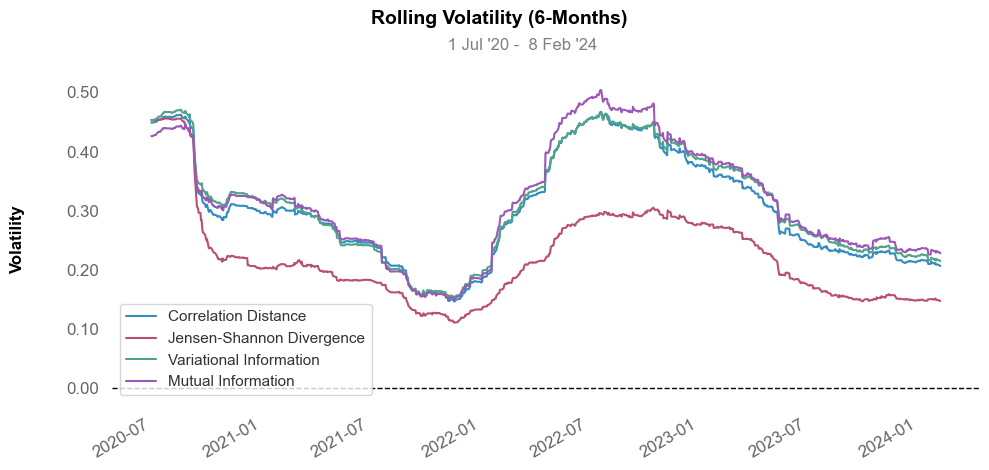

In [52]:
qs.plots.rolling_volatility(backtest, figsize = (10, 5))

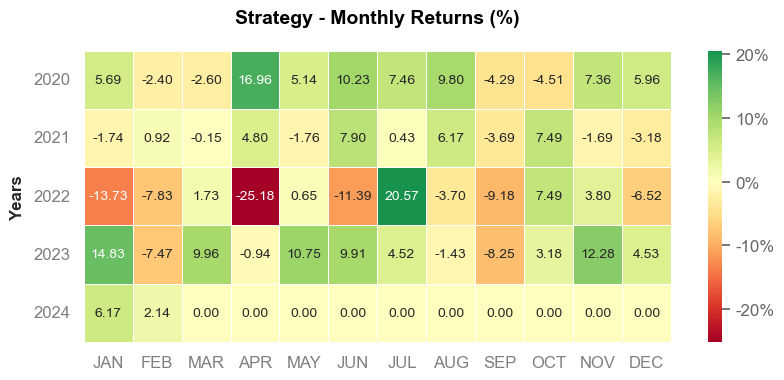

In [56]:
qs.plots.monthly_returns(backtest['Correlation Distance'], figsize = (8, 4))

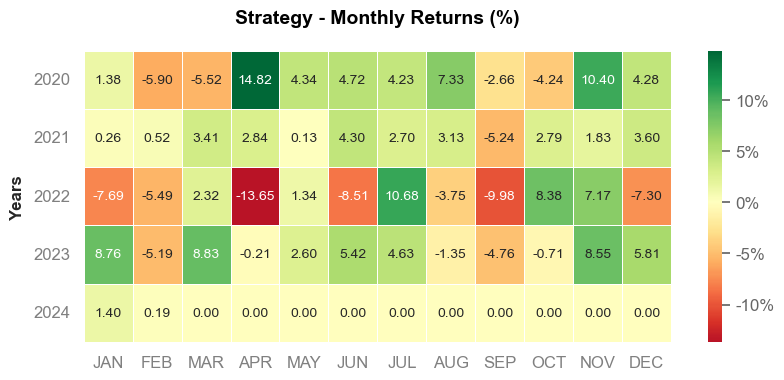

In [57]:
qs.plots.monthly_returns(backtest['Jensen-Shannon Divergence'], figsize = (8, 4))

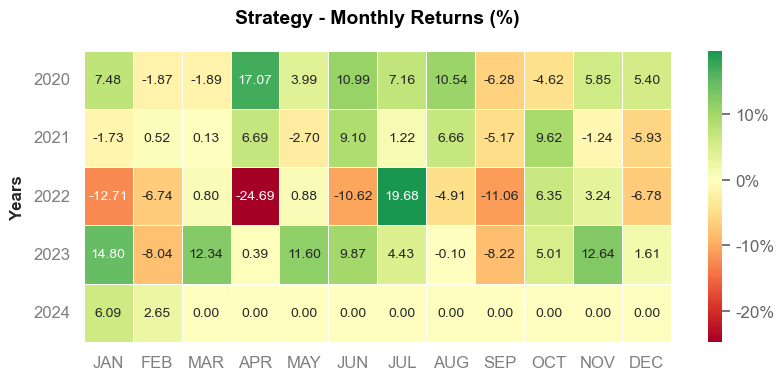

In [58]:
qs.plots.monthly_returns(backtest['Variational Information'], figsize = (8, 4))

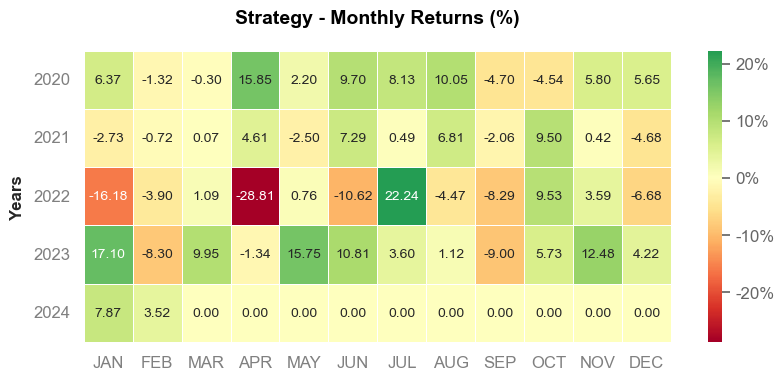

In [59]:
qs.plots.monthly_returns(backtest['Mutual Information'], figsize = (8, 4))

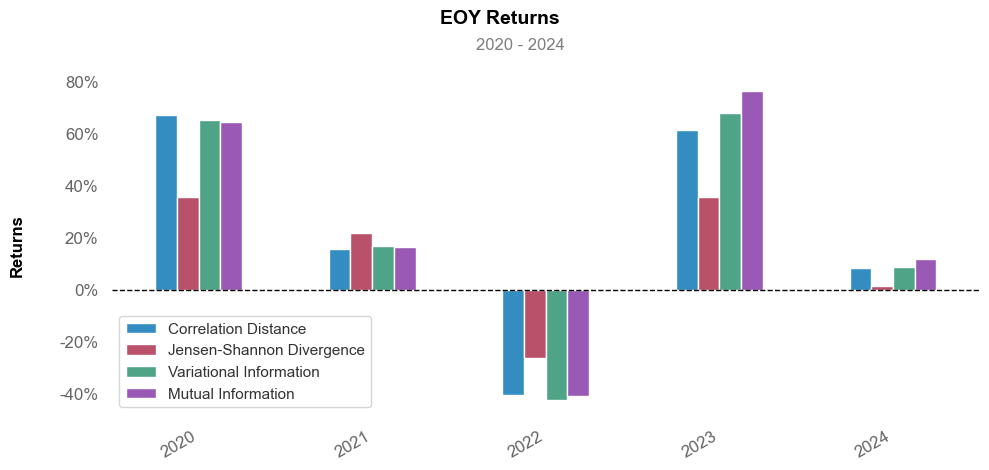

In [60]:
qs.plots.yearly_returns(
    returns = backtest,
)